In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data = pd.read_csv(r"C:\Users\HP\Downloads\car_age_price.csv")

In [35]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [37]:
data.shape

(112, 2)

In [39]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [41]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [52]:
x = data[['Year']]
y = data['Price']

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

### Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
lr = LinearRegression()

In [59]:
lr.fit(x_train,y_train)

LinearRegression()

In [63]:
# Predictions
pre_linear = lr.predict(x_test)
pred_price_2022_linear = lr.predict(pd.DataFrame([[2022]], columns = x_train.columns))

In [77]:
print('Linear Regression : ')
print('Mean Squared Error : ',mean_squared_error(y_test,pre_linear))
print('Mean Absolute Error : ',mean_absolute_error(y_test,pre_linear))
print('R Squared Value : ',r2_score(y_test,pre_linear))
print(f"Predicted Price for Year 2022 : {pred_price_2022_linear[0]:.2f}")

Linear Regression : 
Mean Squared Error :  4326906256.829671
Mean Absolute Error :  53534.77957001264
R Squared Value :  0.36759313425902185
Predicted Price for Year 2022 : 743601.62


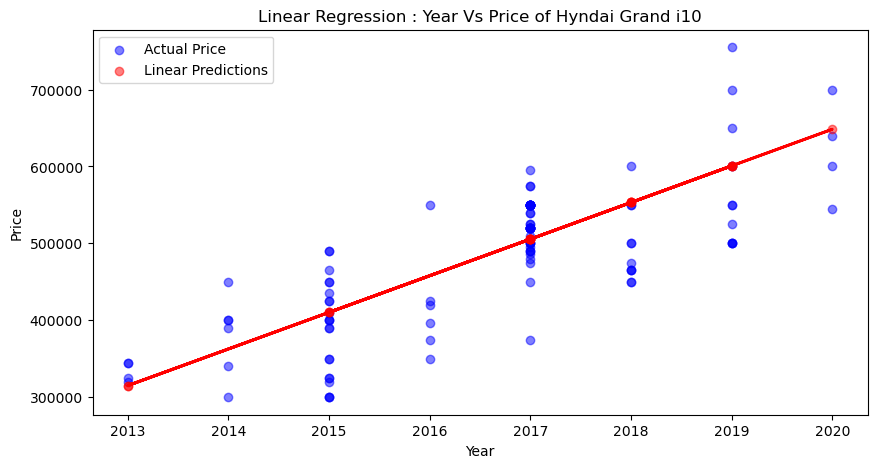

In [79]:
# Visualization for Linear Regression
plt.figure(figsize=(10,5))
plt.scatter(x,y,color = 'blue',label = 'Actual Price', alpha = 0.5)
plt.scatter(x_test,pre_linear,color = 'red',label = 'Linear Predictions',alpha = 0.5)
plt.plot(x_test,pre_linear,color = 'red',linewidth=2) # Line for Linear regression
plt.title('Linear Regression : Year Vs Price of Hyndai Grand i10')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

### Lasso Regression

In [82]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.1)

In [84]:
# Predictions
pre_lasso = lasso_model.predict(x_test)
pre_price_2022_lasso = lasso_model.predict(pd.DataFrame([[2022]], columns = x_train.columns))

In [92]:
print('Lasso Regression : ')
print('Mean Squared Error : ',mean_squared_error(y_test,pre_lasso))
print('Mean Absolute Error : ',mean_absolute_error(y_test,pre_lasso))
print('R Squared Value : ',r2_score(y_test,pre_lasso))
print(f"Predicted Price for Year 2022 : {pred_price_2022_linear[0]:.2f}")

Lasso Regression : 
Mean Squared Error :  4326901608.19506
Mean Absolute Error :  53534.73464390959
R Squared Value :  0.36759381368868127
Predicted Price for Year 2022 : 743601.62


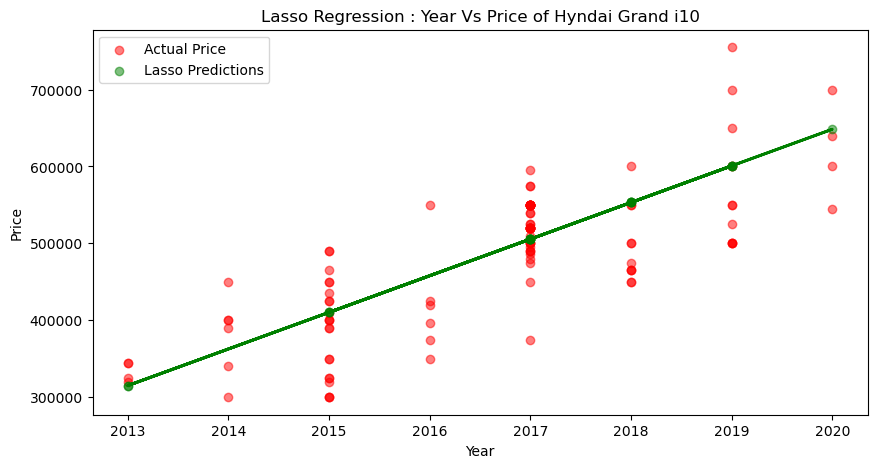

In [96]:
# Visualization for Lasso Regression
plt.figure(figsize=(10,5))
plt.scatter(x,y,color = 'red',label = 'Actual Price', alpha = 0.5)
plt.scatter(x_test,pre_lasso,color = 'green',label = 'Lasso Predictions',alpha = 0.5)
plt.plot(x_test,pre_lasso,color = 'green',linewidth=2) # Line for Lasso regression
plt.title('Lasso Regression : Year Vs Price of Hyndai Grand i10')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()